In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

In [13]:
def downscale_image(image, scale_factor):
    kernel_size = int(1 / scale_factor)
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    downscaled_image = cv2.filter2D(image, -1, kernel)
    downscaled_image = downscaled_image[::kernel_size, ::kernel_size]
    return downscaled_image

def upscale_image(image, scale_factor):
    new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))
    upscaled_image = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
    return upscaled_image

In [22]:
image_path = 'fotograf.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
scale_factor = 1
downscaled_image = downscale_image(original_image, scale_factor)
upscaled_image = upscale_image(downscaled_image, scale_factor**(-1))
original_image_resized = cv2.resize(original_image, upscaled_image.shape[::-1])
mse_upscale = mean_squared_error(original_image_resized.flatten(), upscaled_image.flatten())
original_image_resized = cv2.resize(original_image, downscaled_image.shape[::-1])
mse_downscale = mean_squared_error(original_image_resized.flatten(), downscaled_image.flatten())
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

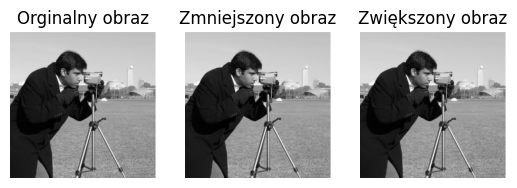

In [26]:
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Orginalny obraz')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(downscaled_image, cmap='gray')
plt.title('Zmniejszony obraz')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(upscaled_image, cmap='gray')
plt.title('Zwiększony obraz')
plt.axis('off')

plt.show()